## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/MouseData.csv"
study_results_path = "Resources/StudyResults.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouse_metadata_path)
studyResults = pd.read_csv(study_results_path)

studyResults.head(3)
# Combine the data into a single dataset
fd = pd.merge(mouseData, studyResults, how = "right", on = "Mouse ID")


# Display the data table for preview
fd.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = fd["Mouse ID"].nunique()
print(f"Number of Mice: {num_mice}.")

Number of Mice: 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = fd.groupby(["Mouse ID", "Timepoint"]).agg({"Sex": "count"})
duplicates = duplicates[duplicates.Sex > 1]
duplicates

# duplicates.index returns a tuple of MouseID and TImepoint pairs - we are only interested in the MouseID
duplicateIDs = [index[0] for index in duplicates.index]
# now we want to remove duplicates from the duplicateIDs list
duplicateIDs = list(dict.fromkeys(duplicateIDs))
print(duplicateIDs)


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# We showed above that there is only one Duplicate mouse ID - so no need to loop. We will just set that one ID to a variable
dupID = duplicateIDs[0]
#print(dupID)
dupData = fd[fd["Mouse ID"] == dupID]
dupData.shape

(13, 8)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanFD = fd[fd["Mouse ID"] != dupID]
cleanFD.shape

(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = cleanFD["Mouse ID"].nunique()
print(f"Number of Mice in Clean DataFrame: {num_mice_clean}.")

Number of Mice in Clean DataFrame: 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
meanSeries = cleanFD.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "mean"})
meanSeries = meanSeries.rename(columns = {
    "Tumor Volume (mm3)": "Mean"
})
#meanSeries.head()

medianSeries = cleanFD.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "median"})
medianSeries = medianSeries.rename(columns = {
    "Tumor Volume (mm3)": "Median"
})
#medianSeries.head()

varianceSeries = cleanFD.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "var"})
varianceSeries = varianceSeries.rename(columns = {
    "Tumor Volume (mm3)": "Variance"
})
varianceSeries.head()

stdSeries = cleanFD.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "std"})
stdSeries = stdSeries.rename(columns = {
    "Tumor Volume (mm3)": "StdDev"
})
stdSeries.head()

semSeries = cleanFD.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "sem"})
semSeries = semSeries.rename(columns = {
    "Tumor Volume (mm3)": "SEM"
})
semSeries.head()

summaryStats1 = pd.merge(meanSeries, medianSeries, how = "left", on = "Drug Regimen")
summaryStats1 = pd.merge(summaryStats1, varianceSeries, how = "left", on = "Drug Regimen")
summaryStats1 = pd.merge(summaryStats1, stdSeries, how = "left", on = "Drug Regimen")
summaryStats1 = pd.merge(summaryStats1, semSeries, how = "left", on = "Drug Regimen")
summaryStats1.head()

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summaryStats2 = cleanFD.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]
})
summaryStats2.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

[Text(0, 0.5, 'Number of Mice'),
 Text(0.5, 0, 'Drug Regimen'),
 Text(0.5, 1.0, 'Mice per Treatment Option')]

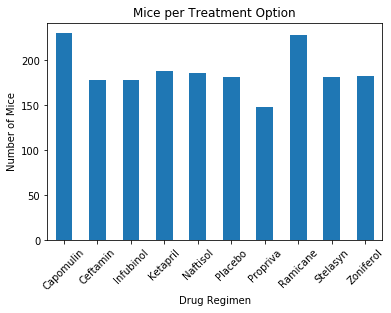

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatmentMice = cleanFD.groupby("Drug Regimen")["Mouse ID"].count()
dfPlot = treatmentMice.plot.bar(rot = 45)
dfPlot.set(xlabel = "Drug Regimen", ylabel = "Number of Mice", title = "Mice per Treatment Option")

Text(0.5, 1.0, 'Mice per Treatment Option')

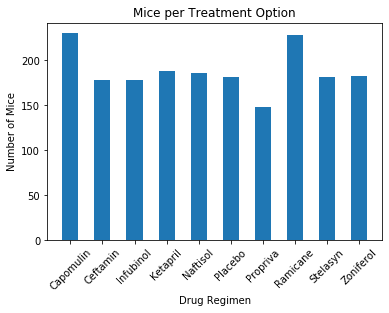

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = [i for i in range(len(treatmentMice.index))]
#print(x_axis)
plt.bar(x_axis, treatmentMice.values, width = 0.5)
plt.xticks(x_axis, treatmentMice.index)
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice per Treatment Option")

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Gender Distibution')]

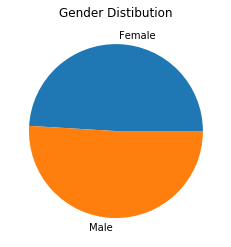

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderSplit = cleanFD.groupby("Sex")["Mouse ID"].count()
dfPie = genderSplit.plot.pie()
dfPie.set(title = "Gender Distibution", ylabel = "")


Text(0.5, 1.0, 'Gender Distribution')

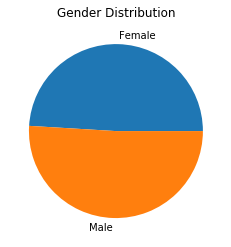

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genderSplit, labels = ["Female", "Male"])
# plt.labels(["Male", "Female"])
plt.title("Gender Distribution")

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTime = cleanFD.groupby("Mouse ID").max()
maxTime = maxTime[["Timepoint", "Sex"]]
maxTime.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxTime = pd.merge(maxTime, cleanFD, how = "left", on = ["Mouse ID", "Timepoint"])
maxTime = maxTime[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
maxTime.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,70.717621
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,63.440686


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = maxTime["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
print(quartiles)
iq1 = quartiles[0.25]
iq3 = quartiles[0.75]
iqr = iq3 - iq1
lowBound = iq1 - (1.5*iqr)
upBound = iq3 + (1.5*iqr)
outliers = maxTime[(maxTime["Tumor Volume (mm3)"] < lowBound)| (maxTime["Tumor Volume (mm3)"] > upBound)]
# outliers.head()
# vols = maxTime[maxTime["Drug Regimen"] == "Capomulin"]
# print(vols["Tumor Volume (mm3)"].values)

    # Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(len(treatments)):
    treatment = treatments[i]
    vols = maxTime[maxTime["Drug Regimen"] == treatment]
    tumorVols.append(vols["Tumor Volume (mm3)"].values)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    

0.25    45.875867
0.50    55.793278
0.75    65.053624
Name: Tumor Volume (mm3), dtype: float64
4


Text(0, 0.5, 'Tumor Size (mm3)')

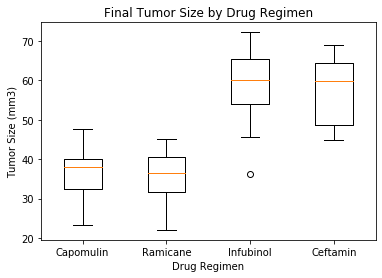

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_axis = [i+1 for i in range(len(treatments))]
plt.boxplot(tumorVols)
plt.xticks(x_axis, treatments)
plt.title("Final Tumor Size by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Size (mm3)")

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
